## Task 1 Reading in data

The first step in analysing any unfamiliar data is to read it into memory and find out some information about its structure.

Complete/answer the following:
* Read BST file it into memory. (Hint, `numpy` makes things easy)
* How many data points are there?
* How does this compare to the file size?
* How many subbands were observed? (Hint, need to know bitmode of observation)
* How long was the observation? 


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime, timedelta
import os
bstfile = "data/modea/20190612_133144_bst_00X.dat"
#Read in data

data = np.fromfile(bstfile)
file_size = os.path.getsize(bstfile)
print(data.shape[0])
print(file_size)

bit_mode = file_size/data.shape[0]
print(bit_mode)

585600
4684800
8.0


In [13]:
print("Number of data points:",data.shape[0])
print("File size:",os.path.getsize(bstfile))
print("Bitmode:",os.path.getsize(bstfile)/data.shape[0])

#bitmode is 8 therefore 488 subbands (not always though)
t_len = data.shape[0]/488

Number of data points: 585600
File size: 4684800
Bitmode: 8.0


## Task 2 Reshaping data

BST data is 2 dimensional, time and frequency. Using what we learned above reshape the data so that it is a 2D array with time on one axis and frequency on another.

In [22]:
#Reshape data
beamlets = 488
data = data.reshape(-1,beamlets)
print(data.shape)

(1200, 488)


## Task 3 Quick plot

We now have everything we need to make a quick plot of our data.

* Use `matplotlib` to produce a dynamic spectrum. Make sure to have time on the x-axis.
* What "mode" was this observation made in? (Hint, log your data)
* Play around with vmin and vmax.

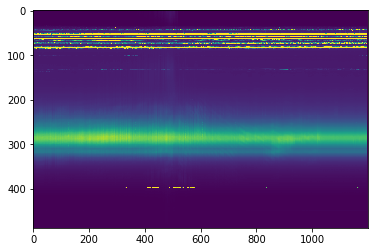

In [28]:
plt.imshow(data.T, aspect="auto", vmin=np.percentile(data,1),
           vmax=np.percentile(data,98))

## Task 4 Updating axes

Let's convert subband number to frequency and include the actual time for our axes.

Remember the conversion from subband number to frequency from earlier

$$\nu = (n-1+ \frac{s}{512})\frac{\nu_{clock}}{2},$$

where $n$ is the nyquist zone, $s$ is the subband number and $\nu_{clock}$ is the clock frequency.

In this example $n=1$ and $\nu_{clock} = 200$ MHz.

* Look at `solar_mode3_20190612_133144.sh` to find which subbands were used.
* Write a function to convert subband number to frequency.
* Using the timestamp in the BST file name, create an array of datetime objects for the time array.
* Replot the data with the correct frequency and time axis.

In [29]:
def sb_to_freq(sb):
    nyq_zone = 1
    clock = 200 #MHz
    freq = (nyq_zone-1+sb/512)*(clock/2)
    return freq #MHz

In [ ]:
#use datetime.strptime or your favourite library to create datetime objects from a string

# subbands="7:494" 
# beamlets="0:487" 
obs_start = bstfile[len(bstfile)-27:len(bstfile)-12]
print(obs_start)
obs_start = datetime.strptime(obs_start, "%Y%m%d_%H%M%S")
obs_len  = timedelta(seconds = ?)
obs_end = obs_start + obs_len
t_lims = [obs_start, obs_end]
t_lims = dates.date2num(t_lims)

## Task 5 Remove background

How would you remove the effect of the antenna bandpass filter?